<a href="https://colab.research.google.com/github/huzaifazshah01/Credit_Card_Fraud_Detection/blob/main/Evaluatingthesecurityofchippins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
# uploading dataset
uploaded = files.upload()

Saving card_transdata.csv to card_transdata.csv


In [ ]:
data = pd.read_csv("card_transdata.csv")

In [ ]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [ ]:
chippindf = data[["used_chip","used_pin_number","fraud"]]

In [ ]:
# calcutaing total number of transaction
total_transactions = len(chippindf)
# calcutaing total number of frauds
total_fraud = chippindf["fraud"].sum()
# calcutaing total number of frauds using chips
fraud_by_chip = chippindf[chippindf["used_chip"]==1]["fraud"].sum()
# calcutaing total number of frauds using oin number
fraud_by_pin = chippindf[chippindf["used_pin_number"]==1]["fraud"].sum()

In [ ]:
print("Total transactions:",total_transactions)
print("Total fraud cases:",total_fraud)
print("fraud uding chip: {} out of {}".format(fraud_by_chip,total_transactions))
print("fraud uding pin: {} out of {}".format(fraud_by_pin,total_transactions))

Total transactions: 1000000
Total fraud cases: 87403
fraud uding chip: 22410 out of 1000000
fraud uding pin: 273 out of 1000000


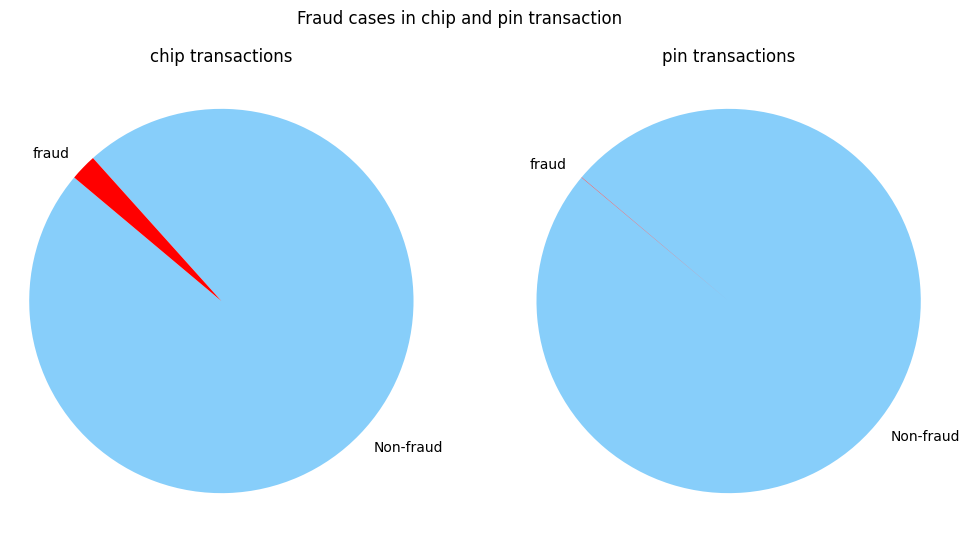

In [ ]:
labels_chip = ["Non-fraud","fraud"]
sizes_chip = [total_transactions - fraud_by_chip, fraud_by_chip]
colors_chip = ["lightskyblue","red"]

labels_pin = ["Non-fraud","fraud"]
sizes_pin = [total_transactions - fraud_by_pin, fraud_by_pin]
colors_pin = ["lightskyblue","red"]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(sizes_chip,labels=labels_chip,colors=colors_chip,startangle=140)
plt.axis("equal")
plt.title("chip transactions")
plt.subplot(1,2,2)
plt.pie(sizes_pin,labels=labels_pin,colors=colors_pin,startangle=140)
plt.axis("equal")
plt.title("pin transactions")
plt.suptitle("Fraud cases in chip and pin transaction")
plt.show()